In [1]:
import os
import random
import pickle
from tqdm import tqdm

import numpy as np
from PIL import Image, ImageDraw

In [2]:
dino_cpkt_path = '/workspace/traffic_light/mmdetection/outputs_result/5_epoch_cascade.pkl'
test_image_path = "/workspace/traffic_light/data/detection/test/images"

In [3]:
categories = [
    "veh_go",
    "veh_goLeft",
    "veh_noSign",
    "veh_stop",
    "veh_stopLeft",
    "veh_stopWarning",
    "veh_warning",
    "ped_go",
    "ped_noSign",
    "ped_stop",
    "bus_go",
    "bus_noSign",
    "bus_stop",
    "bus_warning",
]
id2label = {index: x for index, x in enumerate(categories, start=0)}
label2id = {v: k for k, v in id2label.items()}

# visualization
- ref : https://huggingface.co/docs/transformers/tasks/object_detection

10005334.jpg
3


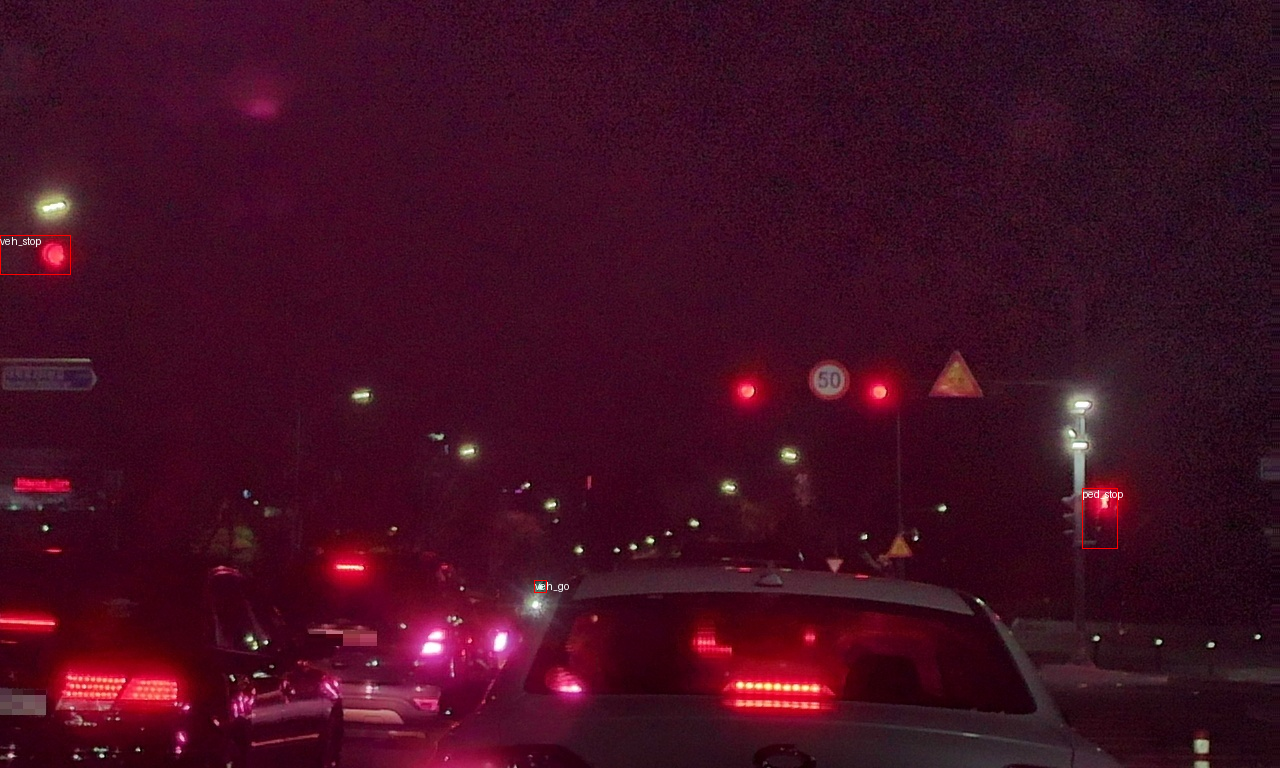

In [8]:
test_annos = os.listdir(test_image_path)
# random_num = random.randrange(10005000, 10000000 + len(test_annos))

random_num = '10005334'

sample_img = os.path.join(test_image_path, f"{random_num}.jpg")
print(os.path.basename(sample_img))

img = Image.open(sample_img)
original_w, original_h = img.size
# print(original_w, original_h)
draw = ImageDraw.Draw(img)


with open(dino_cpkt_path, 'rb') as f:
    datas = pickle.load(f)
    
    for data in datas:
        if data['img_id'] != int(random_num):
            continue
        cnt =0
        # img_path = data['img_path']
        for score, bbox, label in zip(data['pred_instances']['scores'], data['pred_instances']['bboxes'], data['pred_instances']['labels']):
            score = score.numpy()
            label = label.item()
            x_min, y_min, x_max, y_max  = bbox.numpy()

            if y_max > original_h:
                print(x_min, y_min, x_max, y_max)

            # if score < 0.1:  # ! score 조정하기!
            #     continue 
            cnt +=1
            
            draw.rectangle((x_min, y_min, x_max, y_max), outline="red", width=1)
            draw.text((x_min, y_min), id2label[label], fill="white")
        print(cnt)
        break
#
img

In [52]:
def xyxy2xywhn(bbox, w, h):
    x_min, y_min, x_max, y_max  = bbox
    
    if x_max > w:
        x_max = float(w)

    if x_min < 0:
        x_min = float(0)

    if y_max > h:
        y_max = float(h)

    if y_min < 0:
        y_min = float(0)

    norm_w = np.abs(x_max-x_min)/w
    norm_h = np.abs(y_max-y_min)/h
    norm_center_x = (x_max+x_min)/(2*w)
    norm_center_y = (y_max+y_min)/(2*h)
    return (norm_center_x, norm_center_y, norm_w, norm_h)

In [128]:
output_label_path = "/workspace/traffic_light/submission/cascade_convnext_epoch_5"
cnt = 0
os.makedirs(output_label_path, exist_ok=True)
with open(dino_cpkt_path, 'rb') as f:
    labels=pickle.load(f)
    print(len(labels))
    for label in tqdm(labels):
        lines=[]
        file_num = label['img_id']
        original_h, original_w = label['ori_shape']
        # print(original_w, original_h)
        for score, bbox, category in zip(label['pred_instances']['scores'], label['pred_instances']['bboxes'], label['pred_instances']['labels']):
            score = score.numpy()
            if score < 0.1:  # ! score 조정하기!
                continue
            category = category.item()
            x_min, y_min, x_max, y_max  = bbox.numpy()
            norm_center_x, norm_center_y, norm_w, norm_h  = xyxy2xywhn((x_min, y_min, x_max, y_max), original_w, original_h)
            lines.append((category, norm_center_x, norm_center_y, norm_w, norm_h, score))
        if not lines:
            print(file_num)
            cnt+=1
        with open(os.path.join(output_label_path, f'{file_num}.txt'), 'w') as file:
            for line in lines:
                category, norm_center_x, norm_center_y, norm_w, norm_h, score = line
                file.write("%d %lf %lf %lf %lf %lf\n"
                % (category, norm_center_x, norm_center_y, norm_w, norm_h, score))      
# print(file_list)
print("no box files: ", cnt)
print("done")

13505


 28%|██▊       | 3776/13505 [00:00<00:01, 5672.25it/s]

10002878
10002879
10003366
10003367
10003368
10003369
10003370
10003371
10003372
10003373
10003374
10003375
10003376
10003377
10003463
10003464
10003465
10003466
10003467
10003468
10003469
10003505
10003506
10003576
10003577
10003580
10003582
10003606
10003607
10003611
10003664
10003665
10003788
10003789
10003790
10003791
10003792
10003793
10003795
10003796
10003797
10003798
10003897
10003898
10003899


 39%|███▊      | 5212/13505 [00:00<00:01, 6538.46it/s]

10004030
10004031
10004032
10004033
10004034
10004040
10004041
10004062
10004063
10004064
10004065
10004066
10004067
10004068
10004069
10004070
10004071
10004078
10004079
10004080
10004133
10004134
10004188
10004189
10004190
10004191
10004192
10004193
10004194
10004195
10004196
10004197
10004198
10004199
10004200
10004201
10004221
10004223
10004224
10004226
10004227
10004228
10004229
10004230
10004576
10004606
10004607
10004609
10004610
10004612
10004614
10004662
10004663
10004664
10004665
10004821
10004870
10004871
10004872
10004873
10004875
10004958
10004959
10004963
10004964
10004965
10004966
10004967
10004968
10004970
10004972
10004975
10004977
10004981
10004982
10004989
10004992
10004995
10004997
10004998
10004999
10005005
10005007
10005010
10005012
10005013
10005023
10005024
10005034
10005035
10005036
10005037
10005038
10005039
10005040
10005041
10005042
10005043
10005044
10005045
10005046
10005047
10005048
10005049
10005050
10005051
10005052
10005053
10005054
10005055
10005056
1

 50%|████▉     | 6685/13505 [00:01<00:01, 6668.62it/s]

10005648
10005649
10005761
10005764
10005768
10005779
10005780
10005781
10005787
10005789
10005800
10005801
10005803
10005810
10005813
10005815
10005819
10005820
10005824
10005827
10005828
10005829
10005830
10005832
10005833
10005835
10005837
10005838
10005839
10005840
10005841
10005842
10005843
10005846
10005849
10005851
10005852
10005853
10005854
10005855
10005856
10005864
10005869
10005871
10005872
10005873
10005874
10005875
10005879
10005882
10005885
10005889
10005890
10005891
10005893
10005928
10005929
10005930
10005931
10005932
10005933
10005934
10005935
10005938
10005939
10005942
10005943
10005947
10006228
10006289
10006290
10006294
10006298
10006301
10006303
10006305
10006306
10006307
10006309
10006310
10006311
10006318
10006319
10006323
10006331
10006336
10006408
10006441
10006442
10006443
10006445
10006446
10006449
10006451
10006456
10006462
10006463
10006472
10006492
10006493
10006494
10006495
10006496
10006497
10006498
10006499
10006500
10006501
10006502
10006504
10006505
1

 59%|█████▉    | 8027/13505 [00:01<00:00, 6593.00it/s]

10007102
10007390


 69%|██████▉   | 9349/13505 [00:01<00:00, 6553.97it/s]

10008557


 84%|████████▍ | 11369/13505 [00:01<00:00, 6673.27it/s]

10010358
10011273
10011304


 94%|█████████▍| 12726/13505 [00:02<00:00, 6680.30it/s]

10011765
10011846


100%|██████████| 13505/13505 [00:02<00:00, 6262.15it/s]

no box files:  477
done


In [ ]:
# AUG_cascade-convnext 5epoch - no box files : 477
# AUG_cascade-convnext 20epoch - no box files : 793
# NO_AUG_dino_swin_2epoch - no box files : 6
# NO_AUG_dino_swin_4epoch - no box files : 65